In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
jio_data = pd.read_csv("/content/sample_data/jio_data_2years.csv")

jio_data['ClosePrice'] = jio_data['Close Price']
jio_data  = jio_data[['Date','Close Price']]

jio_data['Date'] = pd.to_datetime(jio_data['Date'])

jio_data.dtypes

,0
Date,datetime64[ns]
Close Price,float64


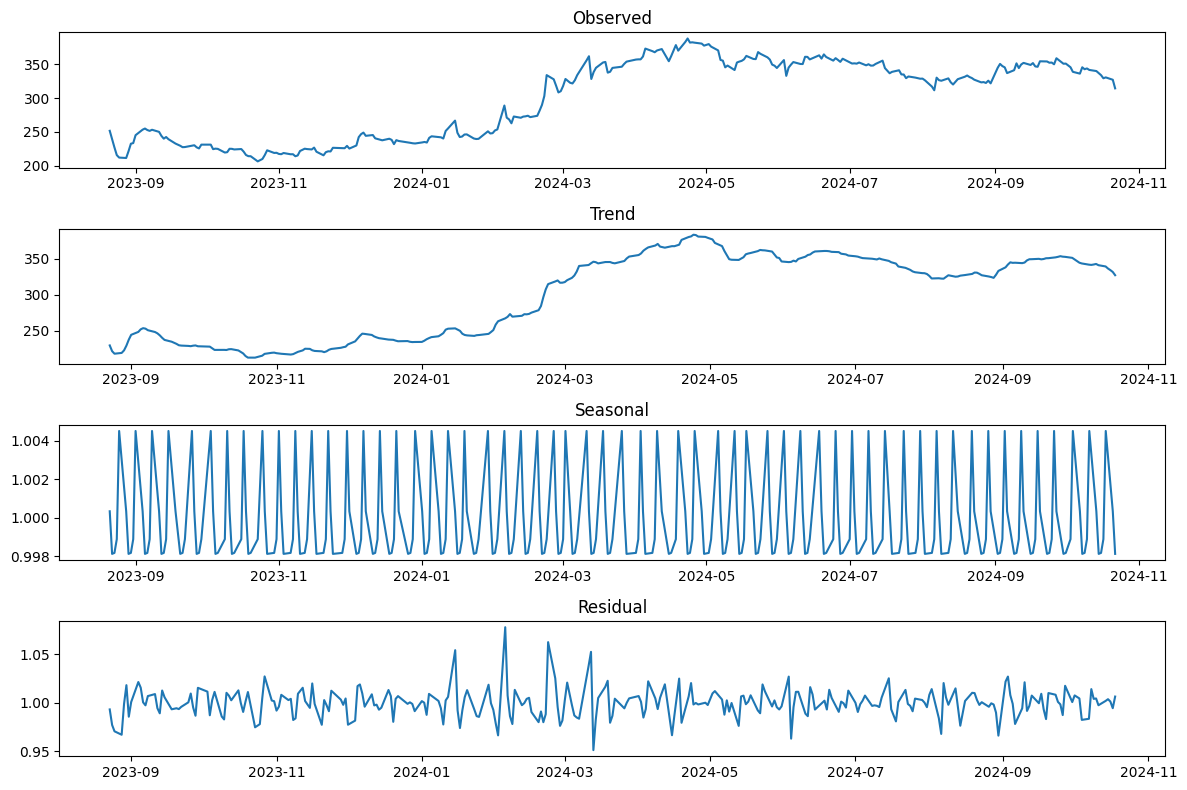

In [ ]:
jio_data.set_index('Date', inplace=True)
jio_data = jio_data.sort_index()

decomposition = seasonal_decompose(jio_data['Close Price'], model='multiplicative', period=5)
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
jio_data = pd.read_csv("/content/sample_data/jio_data_2years.csv")

jio_data['ClosePrice'] = jio_data['Close Price']
jio_data['Date'] = pd.to_datetime(jio_data['Date'])
jio_data.sort_values(by='Date', inplace=True)

jio_data  = jio_data[['Date','ClosePrice']]

jio_data

,Date,ClosePrice
291,2023-08-21,251.75
290,2023-08-22,239.20
289,2023-08-23,227.25
288,2023-08-24,215.90
287,2023-08-25,212.25
...,...,...
4,2024-10-16,333.85
3,2024-10-17,329.25
2,2024-10-18,330.55
1,2024-10-21,327.05


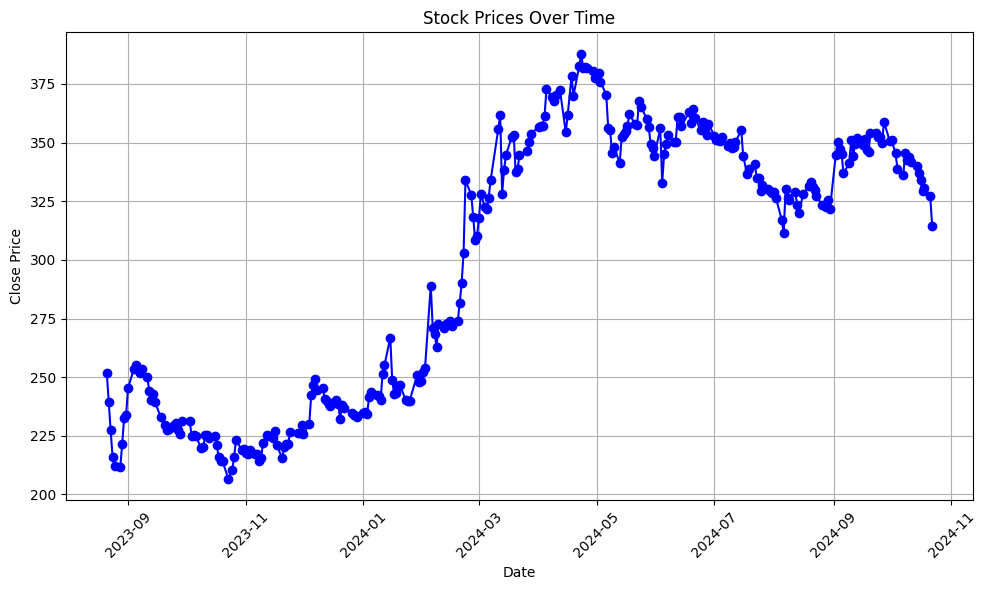

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(jio_data['Date'], jio_data['ClosePrice'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
train = jio_data[:-4]
test = jio_data[-4:]


In [ ]:
last_year_mean = np.mean(train.ClosePrice[-4:])
print(last_year_mean)  # Example output: 12.96


338.0375


In [ ]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean



In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [ ]:
mape_last_year_mean = mape(test['ClosePrice'], test['pred__last_yr_mean'])
print(mape_last_year_mean)


3.9572693064699003


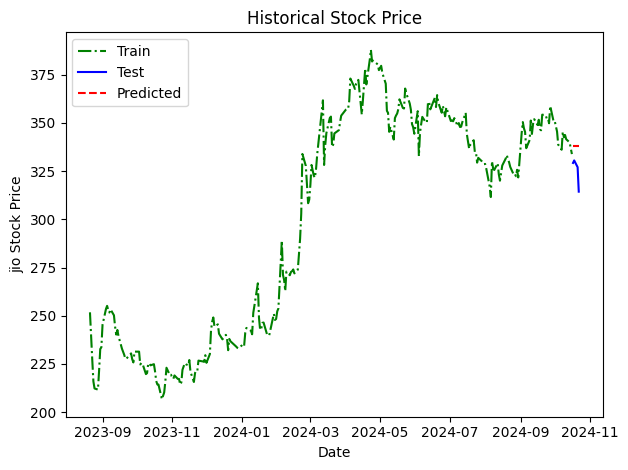

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train['Date'], train['ClosePrice'], 'g-.', label='Train')
ax.plot(test['Date'], test['ClosePrice'], 'b-', label='Test')
ax.plot(test['Date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('jio Stock Price')
ax.set_title('Historical Stock Price')
ax.legend(loc=2)
plt.tight_layout()
plt.show()


# Predicting using the last known value



In [ ]:
last = train.ClosePrice.iloc[-1]

print(last)



333.85


In [ ]:
test.loc[:, 'pred_last'] = last


In [ ]:
mape_last = mape(test['ClosePrice'], test['pred_last'])

print(mape_last)



2.6694800368745373


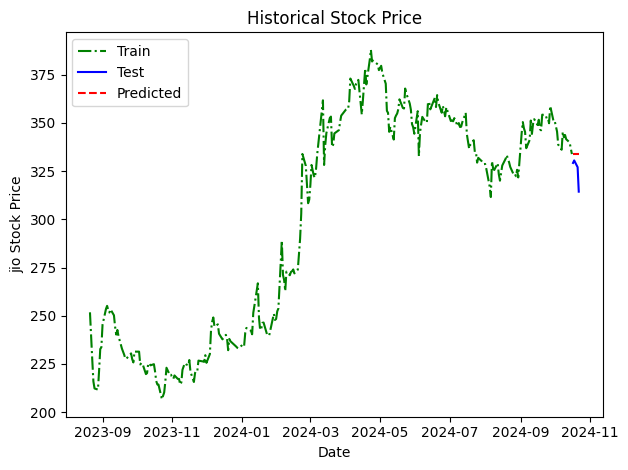

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train['Date'], train['ClosePrice'], 'g-.', label='Train')
ax.plot(test['Date'], test['ClosePrice'], 'b-', label='Test')
ax.plot(test['Date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('jio Stock Price')
ax.set_title('Historical Stock Price')
ax.legend(loc=2)
plt.tight_layout()
plt.show()


# Implementing the naive seasonal forecast


In [ ]:
test.loc[:, 'pred_last_season'] = train['ClosePrice'][-4:].values



In [ ]:
mape_naive_seasonal = mape(test['ClosePrice'], test['pred_last_season'])

print(mape_naive_seasonal)



3.941035596733737


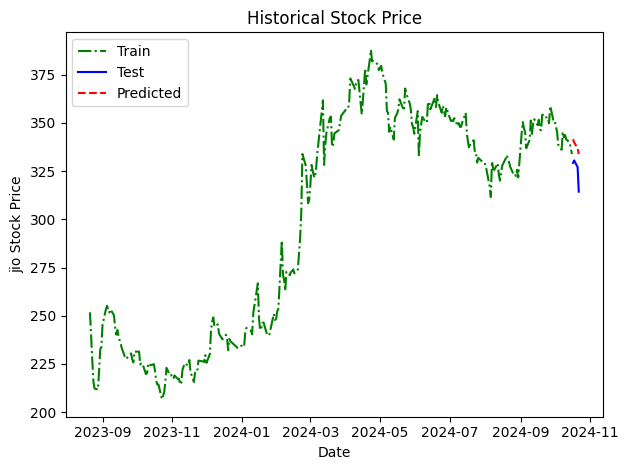

In [ ]:
fig, ax = plt.subplots()
ax.plot(train['Date'], train['ClosePrice'], 'g-.', label='Train')
ax.plot(test['Date'], test['ClosePrice'], 'b-', label='Test')
ax.plot(test['Date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('jio Stock Price')
ax.set_title('Historical Stock Price')
ax.legend(loc=2)
plt.tight_layout()
plt.show()
